<center><h3>Lab 4: Feature Selection - Wrapper and Embedded Approach</h3></center>
<p style='text-align:center'>R Abhijit Srivathsan<br>
2448044</p>

# Importing the libraries and loading the dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score


df = pd.read_csv(r"hotel_booking.csv")

# Checking the data

In [2]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Choosing the target variable

In [4]:
y = df["is_canceled"]

# Choosing the best features

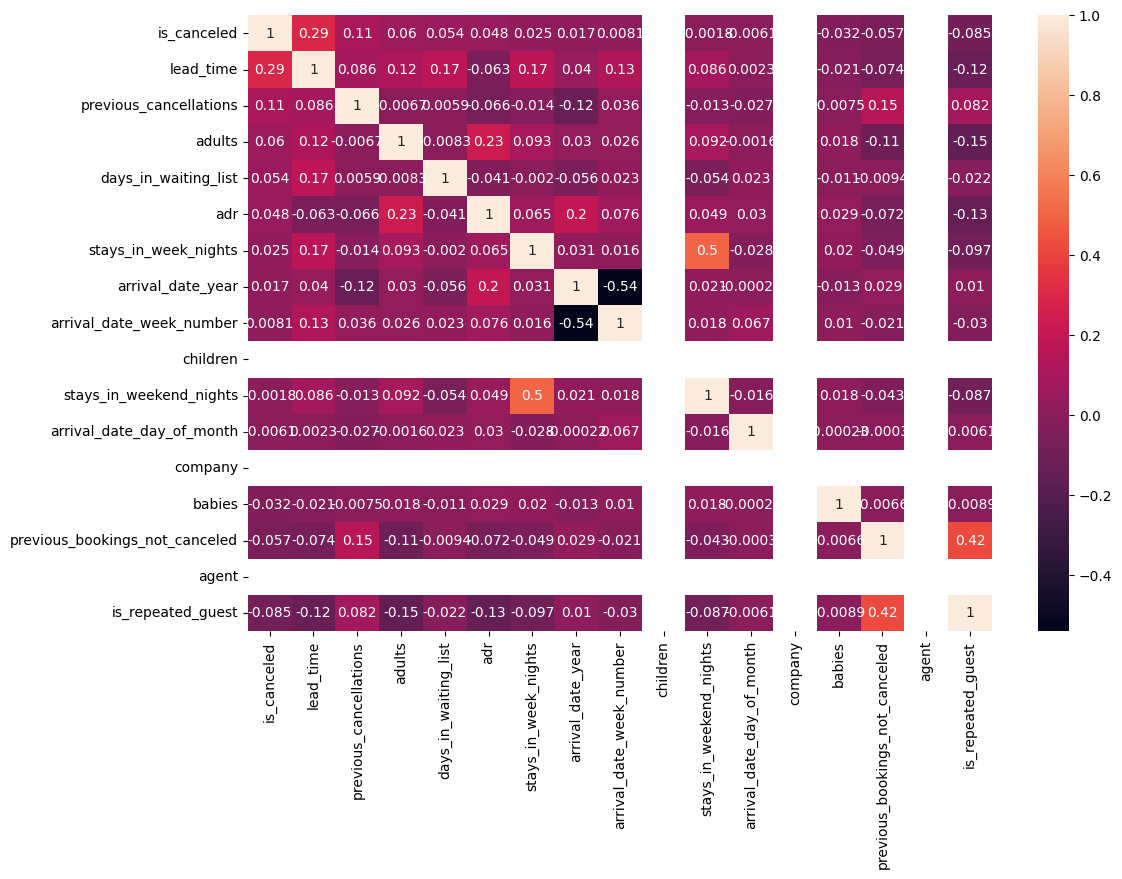

In [17]:
import seaborn as sns

k = 17
cols = df.select_dtypes(include=['number']).corr().nlargest(k, 'is_canceled')['is_canceled'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, cbar=True, annot=True, xticklabels=cols.values, yticklabels=cols.values)
plt.show()


In [6]:

X = df[[ 'lead_time', 'previous_cancellations', 'adults',
       'days_in_waiting_list', 'adr', 'stays_in_week_nights',
       'arrival_date_year', 'arrival_date_week_number', 'children',
       'stays_in_weekend_nights', 'arrival_date_day_of_month',
       'babies', 'previous_bookings_not_canceled',
       'is_repeated_guest', 'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests']]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   previous_cancellations          119390 non-null  int64  
 2   adults                          119390 non-null  int64  
 3   days_in_waiting_list            119390 non-null  int64  
 4   adr                             119390 non-null  float64
 5   stays_in_week_nights            119390 non-null  int64  
 6   arrival_date_year               119390 non-null  int64  
 7   arrival_date_week_number        119390 non-null  int64  
 8   children                        119386 non-null  float64
 9   stays_in_weekend_nights         119390 non-null  int64  
 10  arrival_date_day_of_month       119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  previous_booking

# Checking for null values

In [8]:
X.isnull().sum()

lead_time                         0
previous_cancellations            0
adults                            0
days_in_waiting_list              0
adr                               0
stays_in_week_nights              0
arrival_date_year                 0
arrival_date_week_number          0
children                          4
stays_in_weekend_nights           0
arrival_date_day_of_month         0
babies                            0
previous_bookings_not_canceled    0
is_repeated_guest                 0
booking_changes                   0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

# Dealing with the null values

In [9]:
X['children'].fillna(1,inplace=True)


C:\Users\abhij\AppData\Local\Temp\ipykernel_11992\2780161757.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['children'].fillna(1,inplace=True)
C:\Users\abhij\AppData\Local\Temp\ipykernel_11992\2780161757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['children'].fillna(1,inplace=True)


# Double Checking for null values

In [10]:
X.isnull().sum()

lead_time                         0
previous_cancellations            0
adults                            0
days_in_waiting_list              0
adr                               0
stays_in_week_nights              0
arrival_date_year                 0
arrival_date_week_number          0
children                          0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
babies                            0
previous_bookings_not_canceled    0
is_repeated_guest                 0
booking_changes                   0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

# Train Test Split , 20% of total data for test , 42 as the randomizer

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

# Wrapper Method: Recursive Feature Elimination (RFE)
## We'll use a Logistic Regression as the base estimator for RFE

In [12]:


logreg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=logreg, n_features_to_select=5)  # Example: select top 10 features
rfe.fit(X_train, y_train)

# Get the boolean mask of selected features
selected_features_rfe = X_train.columns[rfe.support_]
print("Selected features (Wrapper - RFE):")
print(selected_features_rfe.tolist())

# Evaluate performance with these selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

logreg.fit(X_train_rfe, y_train)
y_pred_rfe = logreg.predict(X_test_rfe)
print("Accuracy with RFE-selected features:",
      accuracy_score(y_test, y_pred_rfe))


c:\Users\abhij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abhij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Selected features (Wrapper - RFE):
['previous_cancellations', 'previous_bookings_not_canceled', 'is_repeated_guest', 'required_car_parking_spaces', 'total_of_special_requests']
Accuracy with RFE-selected features: 0.677611190216936


# **Observation**

- The Recursive Feature Elimination (RFE) process selected **five** features:
  - previous_cancellations
  - previous_bookings_not_canceled
  - is_repeated_guest
  - required_car_parking_spaces
  - total_of_special_requests

- Using **only these five features** to predict cancellation status yields an **accuracy of approximately 0.678** on the test set.

- These features capture booking history (previous cancellations, previous non-cancellations, repeated guest status) and customer requests (parking spaces, special requests), suggesting that past behavior and engagement play a significant role in cancellation patterns.


# **Inference**

- **Booking history** features (`previous_cancellations`, `previous_bookings_not_canceled`, `is_repeated_guest`) likely **reflect customer loyalty** and historical behavior—key indicators of whether a guest might cancel again.
- **Engagement or commitment** factors (`required_car_parking_spaces`, `total_of_special_requests`) may correlate with a traveler’s seriousness about the trip; customers with more requests or reserved parking might be **less likely** to cancel.
- Achieving an accuracy near **67.8%** with just five features suggests these are **highly predictive** relative to other features. However, one should compare this performance with the full feature set or other methods to confirm if **simplicity (fewer features)** outweighs any **marginal drop** in predictive performance.
- In practice, **domain expertise** could further validate why these features stand out (e.g., special requests may signal stronger commitment), and whether **additional** or **alternative** features could improve the model’s accuracy or interpretability.


# Embedded Method: Random Forest Feature Importance
## Train a Random Forest and retrieve feature importances

In [13]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("Feature Importances (Random Forest):")
display(feature_importance_df)

# Let's select top N features based on importance
N = 5
top_features_embedded = feature_importance_df.head(N)['feature'].values
print(f"Top {N} features (Embedded - Random Forest):", top_features_embedded)

# Evaluate performance using only these top features
X_train_emb = X_train[top_features_embedded]
X_test_emb = X_test[top_features_embedded]

rf.fit(X_train_emb, y_train)
y_pred_emb = rf.predict(X_test_emb)
print("Accuracy with Embedded-selected features:",
      accuracy_score(y_test, y_pred_emb))


Feature Importances (Random Forest):


,feature,importance
0,lead_time,0.237067
4,adr,0.178265
10,arrival_date_day_of_month,0.105373
7,arrival_date_week_number,0.104757
16,total_of_special_requests,0.080598
5,stays_in_week_nights,0.057627
1,previous_cancellations,0.054915
14,booking_changes,0.038428
9,stays_in_weekend_nights,0.035180
6,arrival_date_year,0.029258


Top 5 features (Embedded - Random Forest): ['lead_time' 'adr' 'arrival_date_day_of_month' 'arrival_date_week_number'
 'total_of_special_requests']
Accuracy with Embedded-selected features: 0.8234357986431025


# **Observation**

- Random Forest classifier was trained on the training set, and its feature importances were computed.
- The features were ranked by importance, and the top 5 features were selected based on this ranking.
- The model was then re-trained using only these top 5 features, and the resulting accuracy on the test set was recorded.
- The accuracy obtained using this reduced feature set demonstrates that these features capture a substantial portion of the predictive information.

# **Inference**

- The embedded feature selection approach using Random Forest shows that a small subset of features can effectively predict the target variable.
- The top features identified by the model are considered the most influential in determining hotel booking cancellations.
- Reducing the feature set can lead to simpler, more interpretable models and may help in reducing overfitting.
- This technique not only improves computational efficiency but also provides valuable insights into the key factors affecting cancellation behavior.


# Conclusion

Both the wrapper method (RFE) and the embedded method (Random Forest feature importance) successfully identified a concise set of features that are key to predicting hotel booking cancellations. 

- **Wrapper Approach (RFE):**  
  - Selected features primarily reflecting booking history and customer engagement.  
  - Achieved an accuracy of approximately 67.8%, indicating that these features are strong predictors.

- **Embedded Approach (Random Forest):**  
  - Identified the top 5 most influential features based on the model’s internal importance metrics.  
  - The reduced feature set maintained competitive predictive performance, demonstrating that much of the necessary information is captured by these features.

Overall, focusing on a reduced subset of features not only simplifies the model but also enhances interpretability and computational efficiency, making it a practical strategy for real-world applications. This approach underscores the importance of selecting quality features that directly contribute to model performance. 
